# Importing code

In [1]:
from utils import *
from model import *

# creating DataBunch 

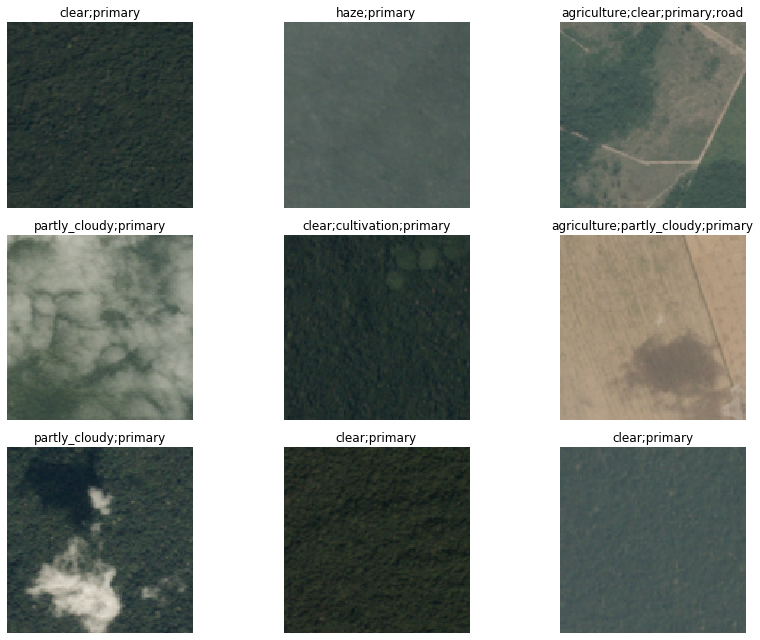

In [2]:
input_path = Path("./data")
data = preprocess_data(input_path)
data.show_batch(rows=3, figsize=(12,9))

# creating Models

In [3]:
model = ensemble_model()
model.build_learners(data)

# Fine Tuning Models

## Training only last layers 

In [4]:
model.freeze()
model.lr_finder()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


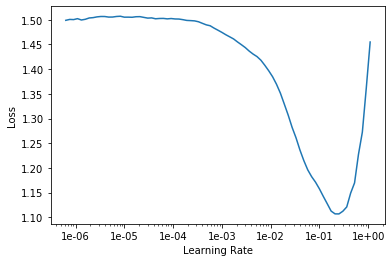

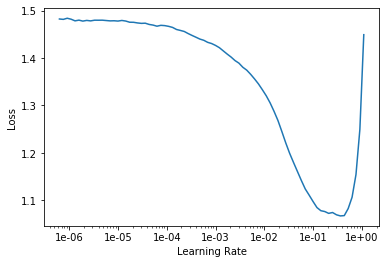

In [5]:
model.lr_finder_plot()

In [6]:
lrs = [slice(0.01),slice(0.02)]
model.one_cycle_policy(lrs)

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.287251,0.253074,0.943516,0.902393,01:00
1,0.259844,0.223742,0.940116,0.912191,01:00
2,0.233800,0.215921,0.951858,0.916929,01:00
3,0.227769,0.206176,0.950340,0.920376,01:00
4,0.220362,0.203425,0.951270,0.921127,01:00


epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.270482,0.238895,0.942688,0.907359,01:05


KeyboardInterrupt: 

## Fine tuning whole models

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


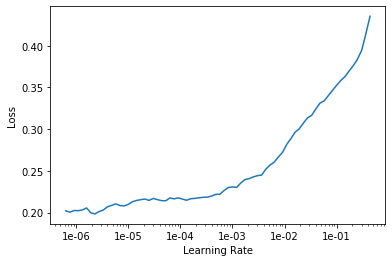

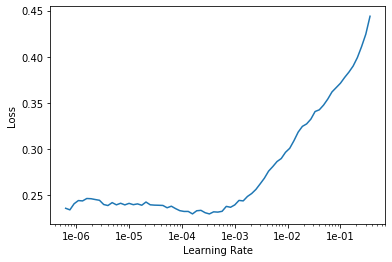

In [7]:
model.unfreeze()
model.lr_finder()
model.lr_finder_plot()

In [8]:
lrs = [slice(1e-06,1e-07) , slice(1e-05,1e-04)]
model.one_cycle_policy(lrs)

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.214769,0.204359,0.951452,0.921374,01:01
1,0.214179,0.203101,0.950187,0.921592,01:02


KeyboardInterrupt: 

In [ ]:
b

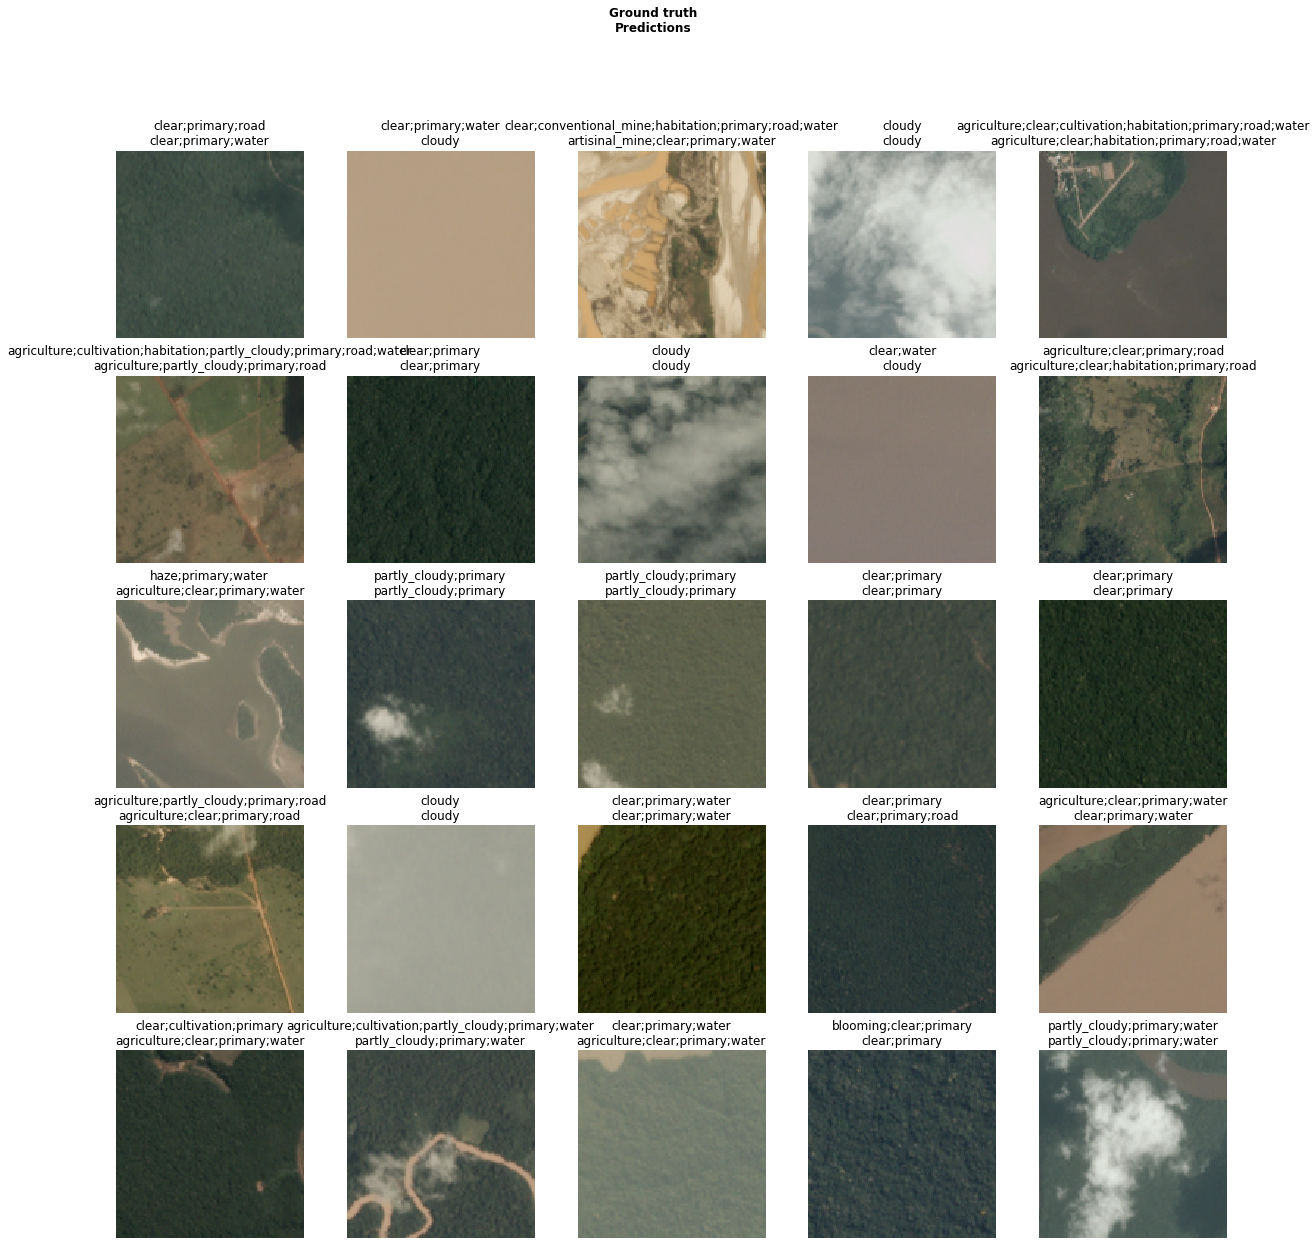

In [15]:
model.learners[1].show_results()

In [61]:
logits_dict = [{i:list() for i in range(2) } for _ in range(17)]
for dit in logits_dict:
    dit["label"] = list()
with torch.no_grad():
    for data in model.learners[0].data.train_dl:
        x , y = data
        for batch_y in y:
            for logit in range(17):
                logits_dict[logit]["label"].append(batch_y[logit])
        for i,learner in enumerate(model.learners):
            y_pred = learner.model(x)
            for batch_pred  in y_pred:
                for logit in range(17):
                    logits_dict[logit][i].append(batch_pred[logit])         
print(len(logits_dict[0]["label"]) ,len(logits_dict[0][0]) )
df = pd.DataFrame(logits_dict[0])

32384 32384


In [57]:
from fastai.tabular import *

In [62]:
df.head()

,0,1,label
0,"tensor(-6.0396, device='cuda:0')","tensor(-3.8386, device='cuda:0')","tensor(0., device='cuda:0')"
1,"tensor(-6.4611, device='cuda:0')","tensor(-5.4219, device='cuda:0')","tensor(0., device='cuda:0')"
2,"tensor(-6.7013, device='cuda:0')","tensor(-4.3411, device='cuda:0')","tensor(0., device='cuda:0')"
3,"tensor(-10.1405, device='cuda:0')","tensor(-7.9429, device='cuda:0')","tensor(0., device='cuda:0')"
4,"tensor(-10.3934, device='cuda:0')","tensor(-6.0257, device='cuda:0')","tensor(0., device='cuda:0')"


In [63]:
data = TabularList.from_df(df).split_by_rand_pct().label_from_df(cols="label").databunch()

In [68]:
with torch.no_grad():
    for data1 in data.train_dl:
        x , y = data1
        print(y)
        

tensor([17398, 14514,  1867,  2935, 24500, 11081,  6242, 15185,  2245, 19566,
        24517,  3399, 19307, 15571,  8514,  8087, 21259, 16142,  8478, 15856,
          745, 19344,  4957, 17109, 11703, 23195, 11240, 10216, 19346, 20752,
        11518, 25664,  4207,  7998, 16710,  1684, 22714, 11688,  1968, 17331,
        12288, 16997,  1202, 16374, 20096, 12999,  7061, 17287, 20996, 15175,
        20561, 20162, 25475,  6969, 14497, 20259, 20483, 25416, 18214, 15228,
        11956,  5379, 19986, 21026], device='cuda:0')
tensor([ 6485,  1318,  1601,  3587, 14537, 25605,  5917, 18127,  9275,  8021,
        17765,  7106, 18882, 10459, 16468, 14271, 18512, 15304,  9079, 14220,
        11191,  5492, 25801,  8310, 21703, 24590,  2752, 21501, 15830, 14653,
        15900, 25834, 15585, 15380, 14967,   669, 17056, 22993, 20283, 20020,
         3512, 24573, 24321, 15865, 15943, 20680, 10155,  6430,  4168, 20929,
        16705,  4538,  9590, 14409, 10569, 15136, 12813, 13424, 24581, 14124,
        21

tensor([ 2792,  5185, 12979, 14705, 18687, 19633, 11969,  3016, 17186, 13619,
         4629, 18017,  9941,  1010, 20726, 16848,  7816, 16130, 18909,  6487,
        18192, 15776, 23456, 14168,  8407,  4840, 24477, 18058,  1724,  2854,
        21319, 15342, 17610,  1103, 24886,  9763, 11412,  6694, 12618,  4452,
        10468,  2041, 17442, 22937,  2787, 24239,  7308,  7694, 12570,  9451,
        21153,  6846, 16566, 15313, 20002,  8662, 11625, 17529, 25196,  1327,
        14910,  7619, 19127,   146], device='cuda:0')
tensor([ 7985, 22934, 15096,  1898,  4883,  8432,  1569, 15484,  6619, 23794,
         1259, 22158, 19134, 11716, 18372, 21096, 19960, 19591, 11889, 17955,
        13675, 18042, 20184,  8266, 24178, 21236,  8537,  9983, 13992, 12613,
         2456, 16738, 23094, 21556,  6069, 10167, 21946, 21732, 19247,  6000,
        17169, 10728,  8449, 25420, 12556, 25708, 13415, 10018, 25633,  3039,
         3370,  1614, 11252,  4875, 19641, 21415, 12043,  6781, 23080,  6261,
         8

        23845, 21926,  1396, 19152], device='cuda:0')
tensor([14116, 22461,  2430,  2751, 17219, 23527,   419,  5710,   812, 23694,
         8775,  9481, 25056,  1578, 18262,  4036,  4987,  8634, 25051,  3848,
        21841, 21484, 16545,  7195, 20587, 19854,  7994, 25024,   885, 18468,
        16337, 11450,  5940, 10722, 23379, 21905,  1447, 22136,  1271, 17954,
         9147, 10358,  3472, 23361,  4615,  7710, 23816,  5637, 14660, 19720,
         6486, 21449, 14536,  1260, 19920, 20872,  4429, 11470, 25550, 24011,
        25340,  2916, 10705,  1330], device='cuda:0')
tensor([ 1205, 15069, 15020, 24324, 10462, 14513,  4321, 19961, 19771, 21170,
        11622, 15415, 13317, 18639,  5664,  1879,  7268,  7339, 17708,  5157,
         4026, 14549, 25534, 25146,  2398, 21011, 22467, 22700,  9374, 21475,
        18885, 19885, 25277, 13884, 10481, 20775,  3354, 20810, 12878,  8828,
         8435, 24313,  2434, 22256, 19054,  8046, 19004, 13016, 15331, 18398,
         9475, 20525, 22889, 11130

tensor([ 6652, 24034,  9886, 21653, 22216, 20244,  4550,  7397, 12233, 17937,
        23789,  5725,  6885, 17383, 18202, 20976, 23668, 20095, 17336, 19902,
        19214, 12357,  3548,  6380,  3638,   896, 13209, 12918, 16224, 19474,
        21112, 13170,   924,  7207, 22380, 17183,  5440,  9696, 24794, 11073,
         9870, 15271, 20046,  5257,  9694, 15371,  6953, 18050, 12752, 16540,
        17065, 15807,  4709, 11895,  8033,   892,  8578, 20555,  7171, 16717,
        24173,  1671,  3424, 10615], device='cuda:0')
tensor([22585, 14977, 13650, 20324,  1098, 17677,  8083,     1,  4040, 17049,
        22499,  8020,  3834, 10631, 23938, 16500,  3020, 24633,  2447,   238,
         6521, 15256,   373,  9888, 18706,  7374, 19568,  9657,  7416, 21677,
        10686, 24827, 19773,  3297, 19122,  9117, 23301,  1792, 20157, 25698,
        11579,  7442,  6979, 20122,  6914,  5097,  9093, 23805, 14211,   205,
        10578,  9734, 13122,  1363,  9437,   931,  8848, 19241, 22926, 16179,
        19

tensor([23665, 15255, 21508, 10787,  4966,   445, 18257, 14131, 10624,  5730,
         6090, 18465, 12688, 10483,   853,  2110, 21156, 10350,  6608, 16103,
         6728,  5471, 24846,  5702,  7303, 24017, 13194,  6874,  9098,  7210,
         5293, 20338, 19427, 16906,  4190, 10084,  1147, 14417,  1854, 22229,
        24296, 13335,  3580,  8107, 15981,  2395, 19087, 20912,  5118,  9262,
          707, 18868, 19393,  2200,  7198, 23421, 25220, 13026,  9986, 25520,
           68, 21473, 11945, 20808], device='cuda:0')
tensor([19175,  6720,   492,  9182, 12181,  6066,  9803, 24484,  6689, 18473,
        16162,  4278, 15219, 11530, 18611, 23176, 15350,  5691,   767, 15507,
        18961, 21783, 16078, 13594, 13011, 23069, 13202,  1433, 14007, 19689,
        14015, 22615,  7477, 15912, 13635, 23036, 24244,  1692, 12147,  7970,
        23491, 16594,  5207, 16823, 19138, 12062,  3991, 17965, 20687,  2317,
         1496,  4936,  5839, 17527, 21362, 13905, 21812,  9516, 21968, 24106,
        19

tensor([17297, 23310,  1139, 18488, 14970,  8635, 10363, 13836,  4140, 10470,
         2159,  1342,  9650,   576, 22707, 23490, 12453,  2111, 18509,  2702,
        18290,  8218, 21977,  1575,  6215,  2735, 13972,  3863, 23171, 19630,
        10866, 15785,  5568, 14542, 25235,   260,  7349,  4646, 20089,  8244,
        25510,  2002, 13641, 15572,  1830,  6369,  3082, 23416, 19665, 23661,
         2166,  8540,  3344, 11641,  4020,  6003, 23653, 18686, 11896,  1775,
         6028, 21476, 11681,  3261], device='cuda:0')
tensor([ 9810, 14556,  1065, 21635,  5566,  7108, 23445,  7082, 21595, 22624,
        16106, 13396, 22346, 13732,  3440,  5868,  9586, 10087,  7260, 24209,
        12845, 24927, 11211, 16108, 11288, 20508, 13848,  5027,  5599,  7884,
        12847, 16731, 10902,  8771,  4933,  3145,  7236,  3542,  4485,  1670,
        18437,  2277, 14311,  3428, 10439, 10362, 10755, 21676, 15369, 14069,
         4607, 11349, 21370, 25261, 15029,  7686, 21762,  5958, 10698, 18405,
        18